In [1]:
import numpy as np
import scipy.constants as c
import matplotlib.pyplot as plt
import util
import axion_mass as m_a
import config
model = config.Model()

/home/janik/Documents/bachelor/axion_mass.py:54: RuntimeWarning: invalid value encountered in power
  correction_factor = (1 - np.log(Lambda / T))**d
/usr/local/lib/python3.6/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


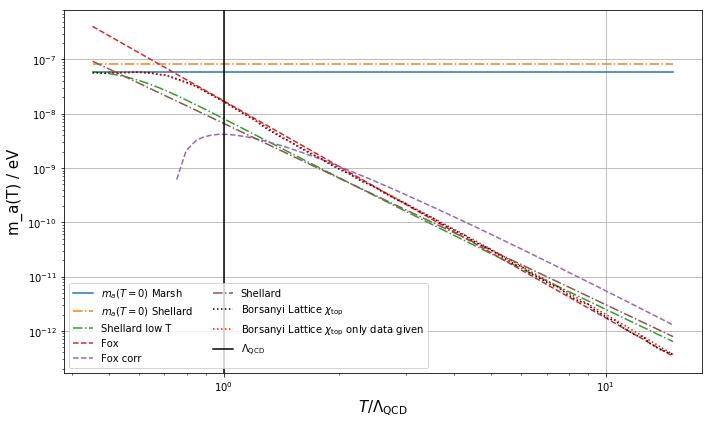

In [7]:
# general constants
f_a = 1e14 * 1e9
fig, ax = plt.subplots(figsize=(10, 6))

##################################### T = 0 #####################################
ax.loglog(m_a.T / model.Lambda_QCD, m_a.m_a_at_abs_zero_from_marsh(f_a) * np.ones(np.size(m_a.T)), 
             # label=r"$m_a(T = 0) = 6 \cdot 10^{-10} \mathrm{eV} \, \frac{10^{16} \, \mathrm{GeV}}{f_a / N}$ Marsh")
             label=r"$m_a(T = 0)$ Marsh")

ax.loglog(m_a.T / model.Lambda_QCD, m_a.m_a_at_abs_zero_from_shellard(f_a) * np.ones(np.size(m_a.T)),
            # label=r"$m_a(T = 0) = \frac{m_\pi f_\pi \sqrt{m_u m_d}}{f_a (m_u + m_d)}$ Shellard")
            label=r"$m_a(T = 0)$ Shellard", linestyle="-.")

##################################### low T from shellard ##############################
ax.loglog(m_a.T / model.Lambda_QCD, m_a.m_a_at_low_T_from_shellard(m_a.T, f_a), linestyle="-.", label="Shellard low T")

##################################### T > Lambda_QCD ###############################
# fox for high T > Lambda_QCD
ax.loglog(m_a.T / model.Lambda_QCD, m_a.m_a_at_high_T_from_fox(m_a.T, f_a, False), "--", label="Fox")
ax.loglog(m_a.T / model.Lambda_QCD, m_a.m_a_at_high_T_from_fox(m_a.T, f_a, True), "--", label="Fox corr")

# shellard for high T
ax.loglog(m_a.T / model.Lambda_QCD, m_a.m_a_at_high_T_from_shellard(m_a.T, f_a), label="Shellard", linestyle="-.")

# marsh for high T
# ax.loglog(m_a.T / model.Lambda_QCD, m_a.m_a_at_high_T_from_marsh(m_a.T, f_a), label="Marsh high T")

#################################### general lattice result ################################
ax.loglog(m_a.T / model.Lambda_QCD, m_a.m_a_from_chi(m_a.T, f_a),
        # label=r"$m_a(T) = \sqrt{\chi_\mathrm{top}} / f_a$ Lattice Borsanyi")
        label=r"Borsanyi Lattice $\chi_\mathrm{top}$", linestyle=":", color="black")

ax.loglog(m_a.T_paper / model.Lambda_QCD, np.sqrt(m_a.chi_paper) / f_a, 
        label=r"Borsanyi Lattice $\chi_\mathrm{top}$ only data given", linestyle=":", color="red")

##################################### make the plot ###################################
ax.axvline(model.Lambda_QCD / model.Lambda_QCD, label=r"$\Lambda_\mathrm{QCD}$", linestyle="-", color="black")
ax.set_xlabel(r"$T / \Lambda_\mathrm{QCD}$", fontsize=15)
ax.set_ylabel("m_a(T) / eV", fontsize=15)
plt.grid()
#lgd = ax.legend(loc=(0.3, 0.5), ncol=2)
ax.legend(loc="lower left", ncol=2)
plt.tight_layout()
plt.savefig("Plots/m_of_T_plot.pdf") # , bbox_extra_artists=(lgd,))

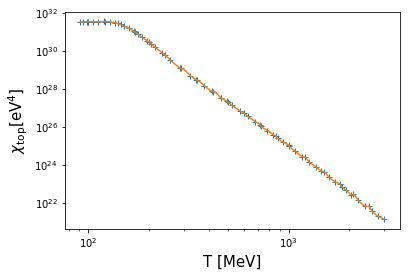

In [3]:
plt.loglog(m_a.T / 1e6, m_a.chi, "+")
T = np.linspace(m_a.T[0], m_a.T[-1], 300)
plt.loglog(T / 1e6, m_a.chi_interp(T))

plt.xlabel("T [MeV]", fontsize=15)
plt.ylabel(r"$\chi_\mathrm{top} [\mathrm{eV}^4]$", fontsize=15)
plt.savefig("Plots/chi_of_T.pdf")